# Class-discriminative attention maps for Vision Transformer

Notebook serves as an interface to call few ViT-based models on LIDC dataset. Also, it allows visualization of results both with attention maps and Class-Discriminative Attention Maps.

In [3]:
%load_ext autoreload
%autoreload 2

from my_utils.CDAM_pipeline import call_CDAM
from my_utils.plot_utils import sample_test_example

In the cell below you can set up parameters of a prediction. In particular, </br>
**FOLD** - Models were trained on 5 folds and it is possible to call each of the cross-validation models. </br>
**CKPT_VERSION** - During training three checkpoints of the lowest valdiational loss were saved. You can choose from: 1, 2, 3 </br>
**RANDOM_TEST** - When `True`, prediction will be call on an random image from a validation set. You can be sure, that model wasn't trained on that image. </br>
**NODULE** - Nodule id to retrieve nodule crop from `dataset/crops` directory. When **RANDOM_TEST** is `False` you need to specify it. </br>
**SLICE** - Nodule slice on which prediction will be done. All models there works only on extracted slice from a whole nodule crop. </br>
**NODULE_VIEW** - View of nodule slice. It may be one from the following: "axial", "coronal", "sagittal". </br>
**TASK** - Mode of prediction. Whether to predict biomarkers or directly predict probability of malignancy. It might be: "Classification" or "Regression". {Curently only classification.} </br>
**MODEL_BCKB** - There is plenty of different Vision Transformers backbones to choose, with different number of parameters and different patch size. Available backbones: </br> 
* `"dino_vits8"`
* `"dino_vitb8"`
* `"dino_vits16"`
* `"dino_vitb16"`
* `"vit_b_16"`
</br>


0262.pt, 0080.pt 0201.pt 0209.pt

In [17]:
#SETUP
FOLD=1 # From 1 to 5.
RANDOM_TEST=False # True or False
NODULE = sample_test_example(FOLD=FOLD) if RANDOM_TEST else "0384.pt"
SLICE=16 # From 0 to 31
NODULE_VIEW="axial" # "axial", "coronal", "sagittal"
TASK="Regression" # "Classification", "Regression" -> curently only "Classification"
MODEL_BCKB="dino_vitb8" # "dino_vits8", "dino_vitb8", "dino_vitb16", "dino_vits16", "vit_b_16","dinov2_vitb14_reg", "dinov2_vits14_reg"
CKPT_VERSION=1 # 1, 2, 3

print(f"Chosen Nodule: {NODULE}")

Chosen Nodule: 0384.pt


Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


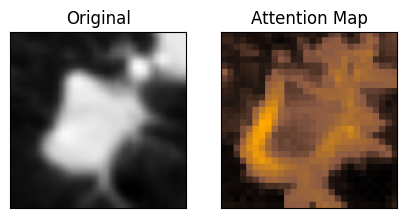

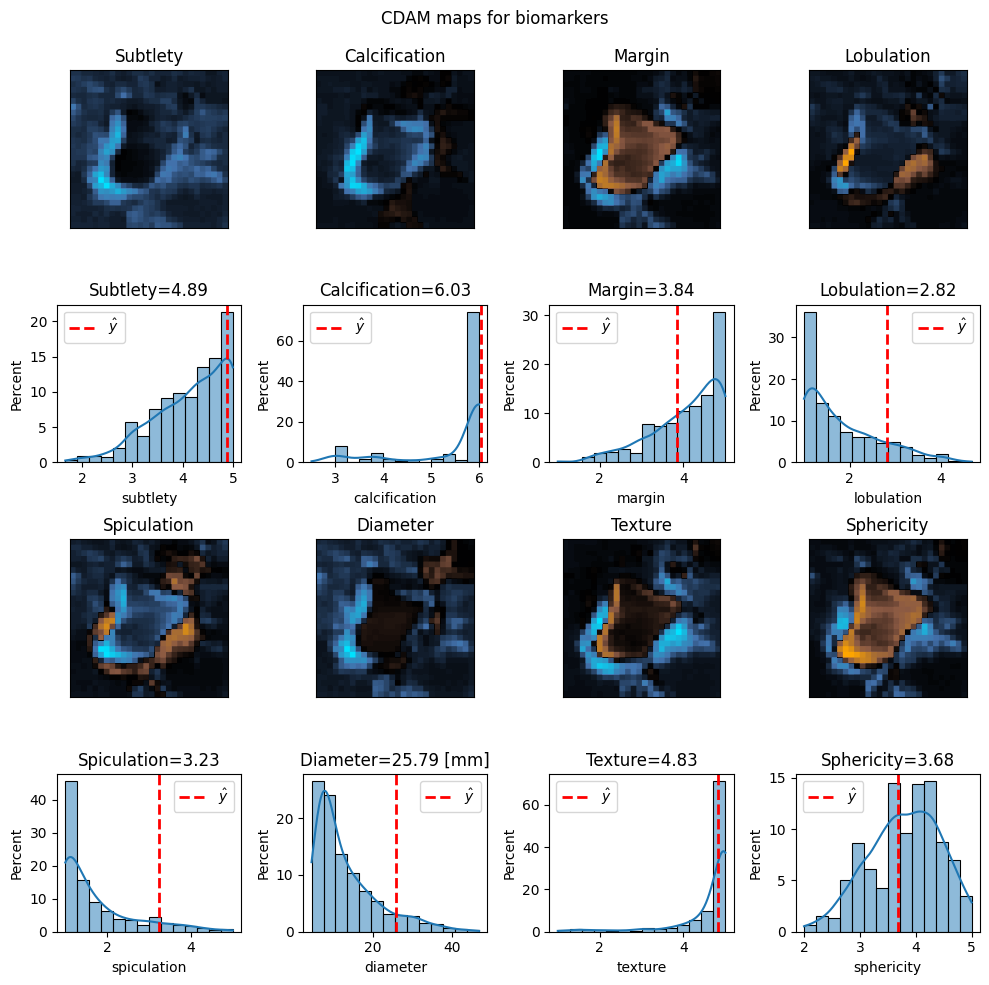

In [18]:
call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

## Exemplary results - Classification

In [19]:
#SETUP
FOLD=1
RANDOM_TEST=False 
NODULE = sample_test_example(FOLD=FOLD) if RANDOM_TEST else "0384.pt"
SLICE=16
NODULE_VIEW="axial"
TASK="Classification"
CKPT_VERSION=1

### ViTb_16

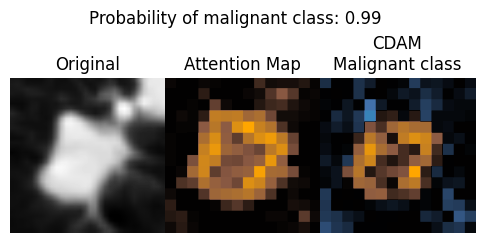

In [20]:
MODEL_BCKB="vit_b_16"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINO_ViTs_8

Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


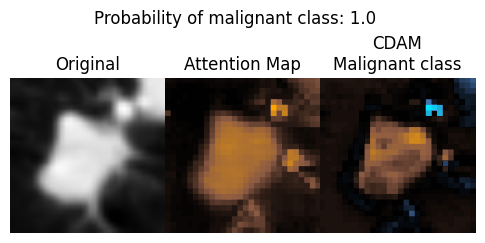

In [21]:
MODEL_BCKB="dino_vits8"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINO_ViTs_16

Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


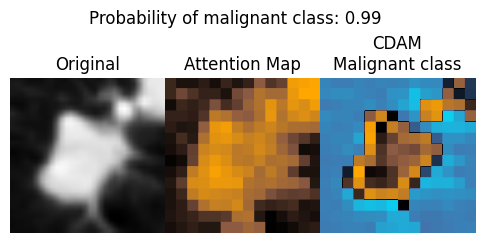

In [22]:
MODEL_BCKB="dino_vits16"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINO_ViTb_8

Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


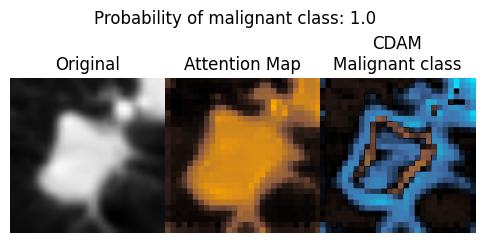

In [23]:
MODEL_BCKB="dino_vitb8"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINO_ViTb_16

Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


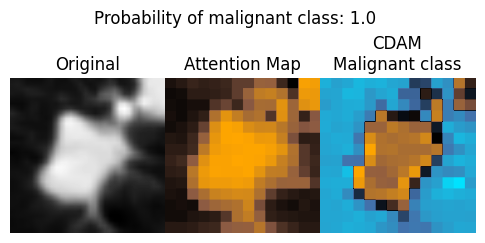

In [24]:
MODEL_BCKB="dino_vitb16"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINOv2_vits14_reg

In [ ]:
MODEL_BCKB="dinov2_vits14_reg"

# TO DO

### DINOv2_vitb14_reg

In [ ]:
MODEL_BCKB="dinov2_vitb14_reg"

# TO DO

## Exemplary results - Regression

In [25]:
#SETUP
FOLD=1
RANDOM_TEST=False 
NODULE = sample_test_example(FOLD=FOLD) if RANDOM_TEST else "0384.pt"
SLICE=16
NODULE_VIEW="axial"
TASK="Regression"
CKPT_VERSION=1

### ViTb_16

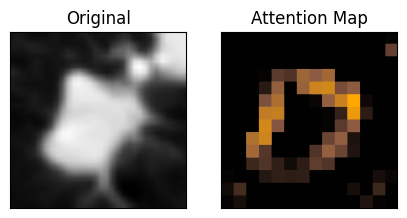

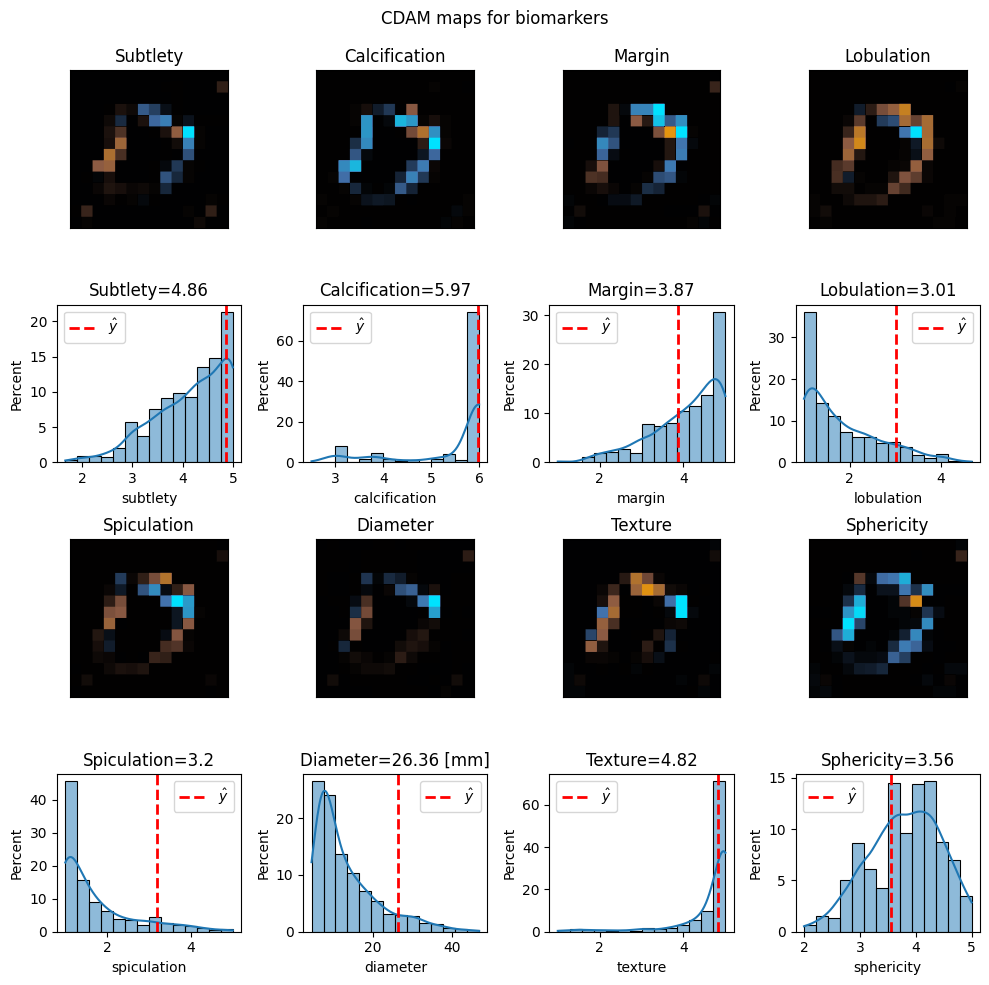

In [26]:
MODEL_BCKB="vit_b_16"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINO_ViTs_8

Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


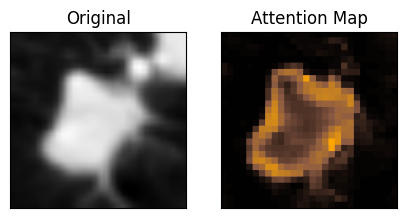

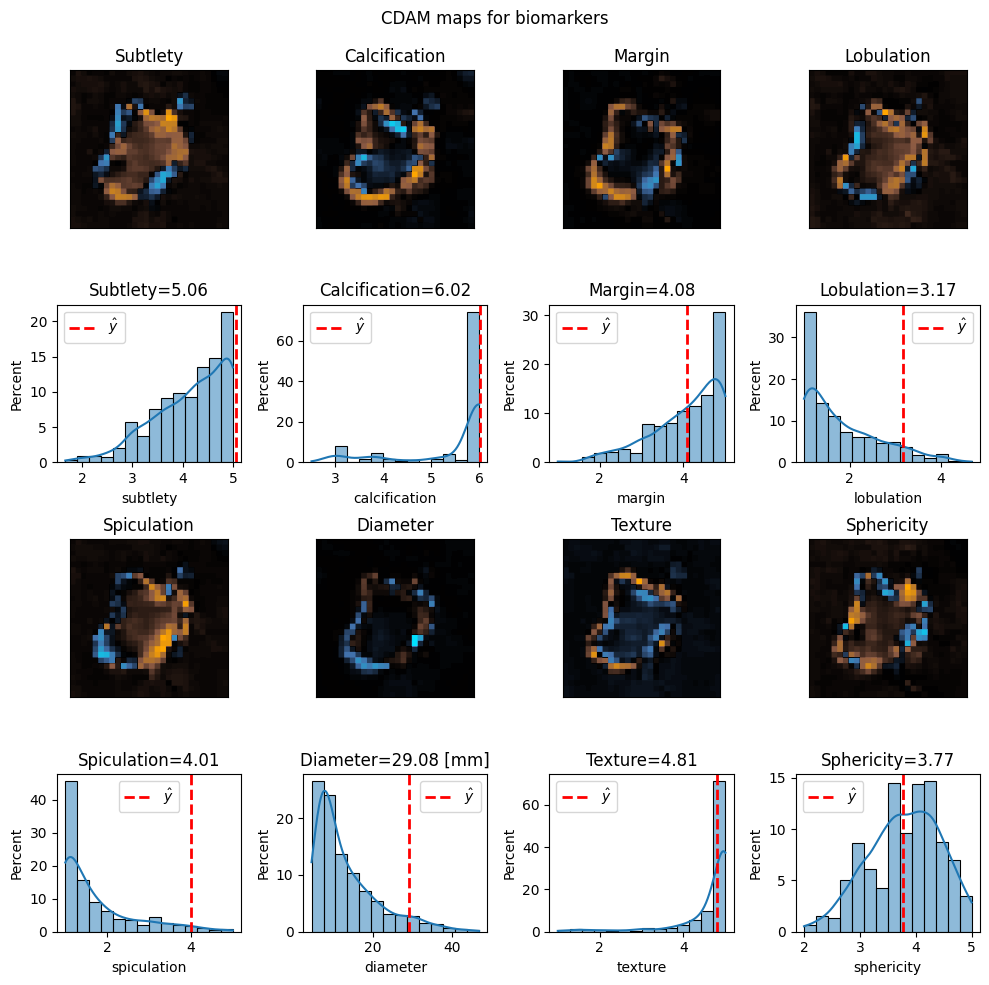

In [27]:
MODEL_BCKB="dino_vits8"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINO_ViTs_16

Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


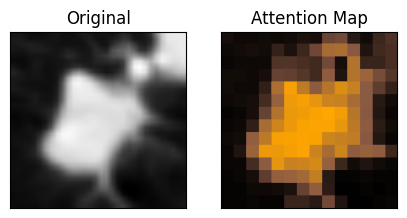

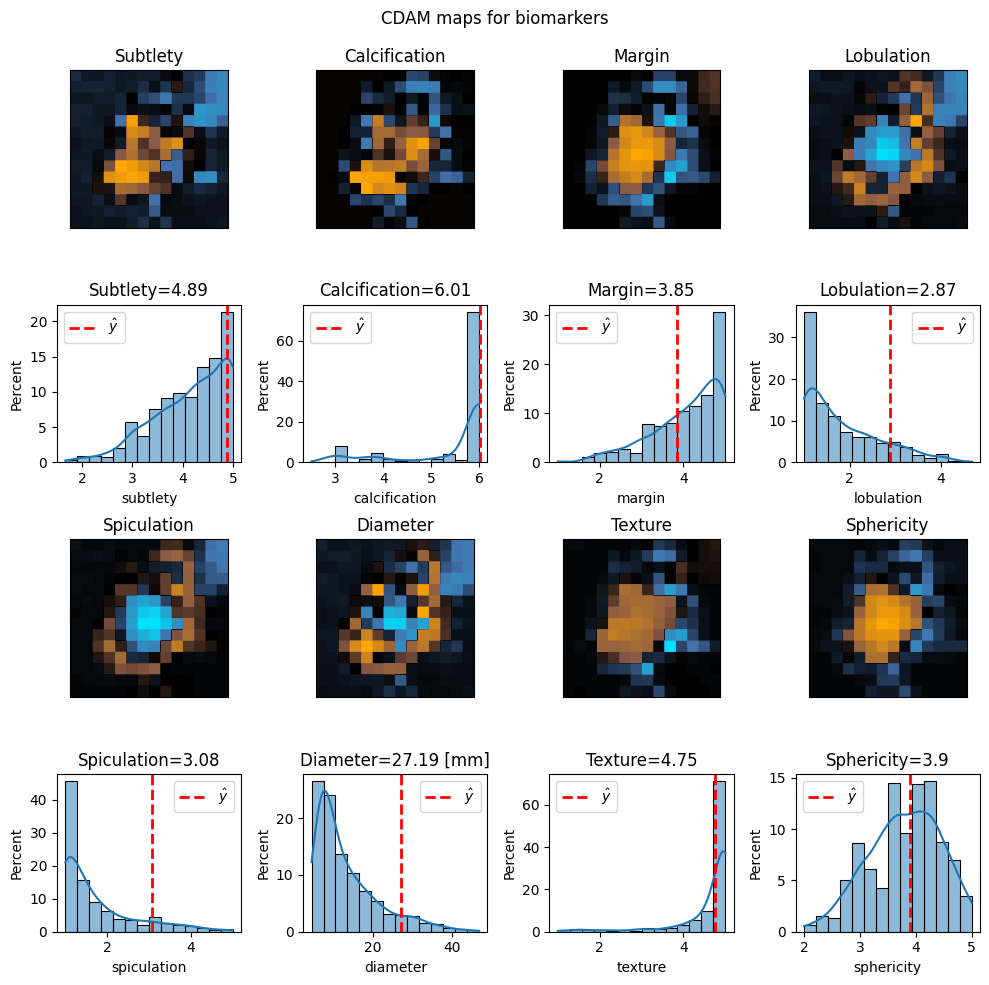

In [28]:
MODEL_BCKB="dino_vits16"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINO_ViTb_8

Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


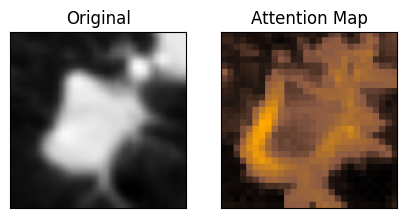

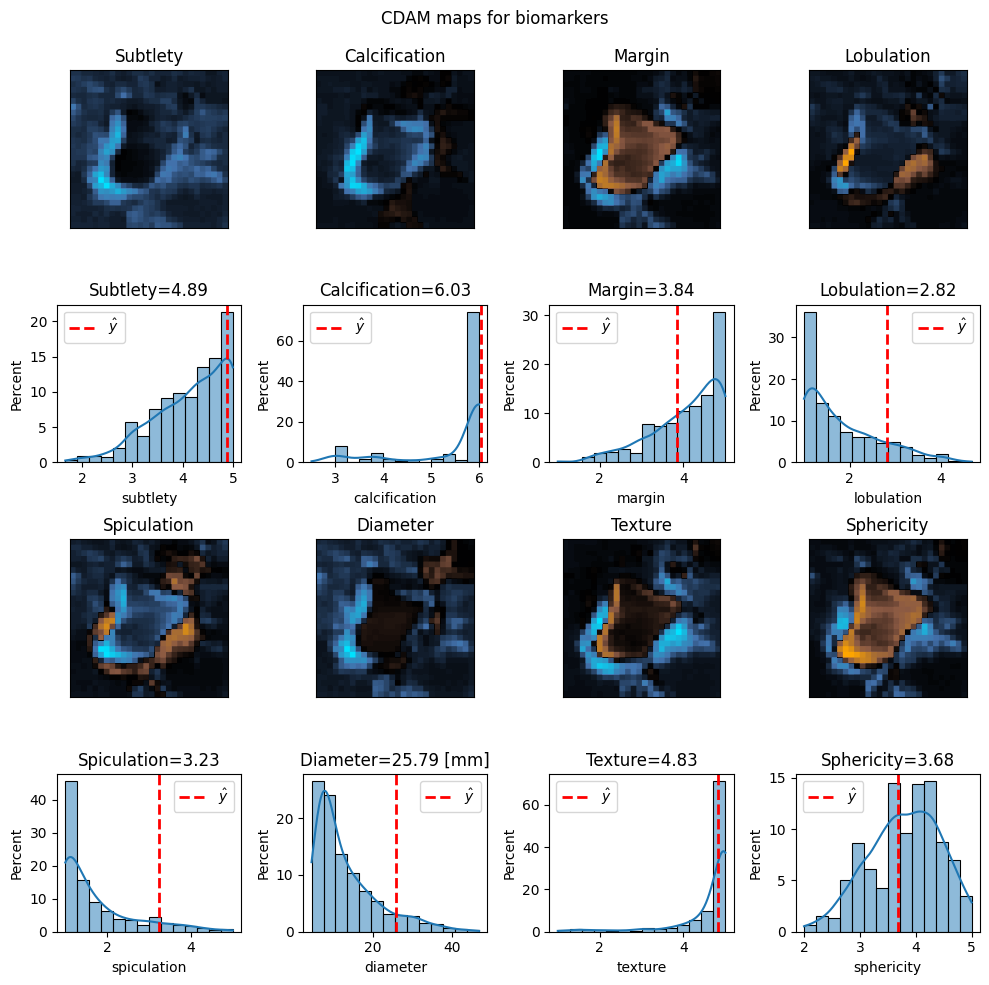

In [29]:
MODEL_BCKB="dino_vitb8"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINO_ViTb_16

Using cache found in /home/dzban112/.cache/torch/hub/facebookresearch_dino_main


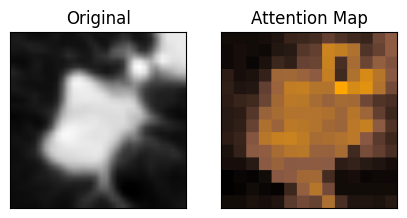

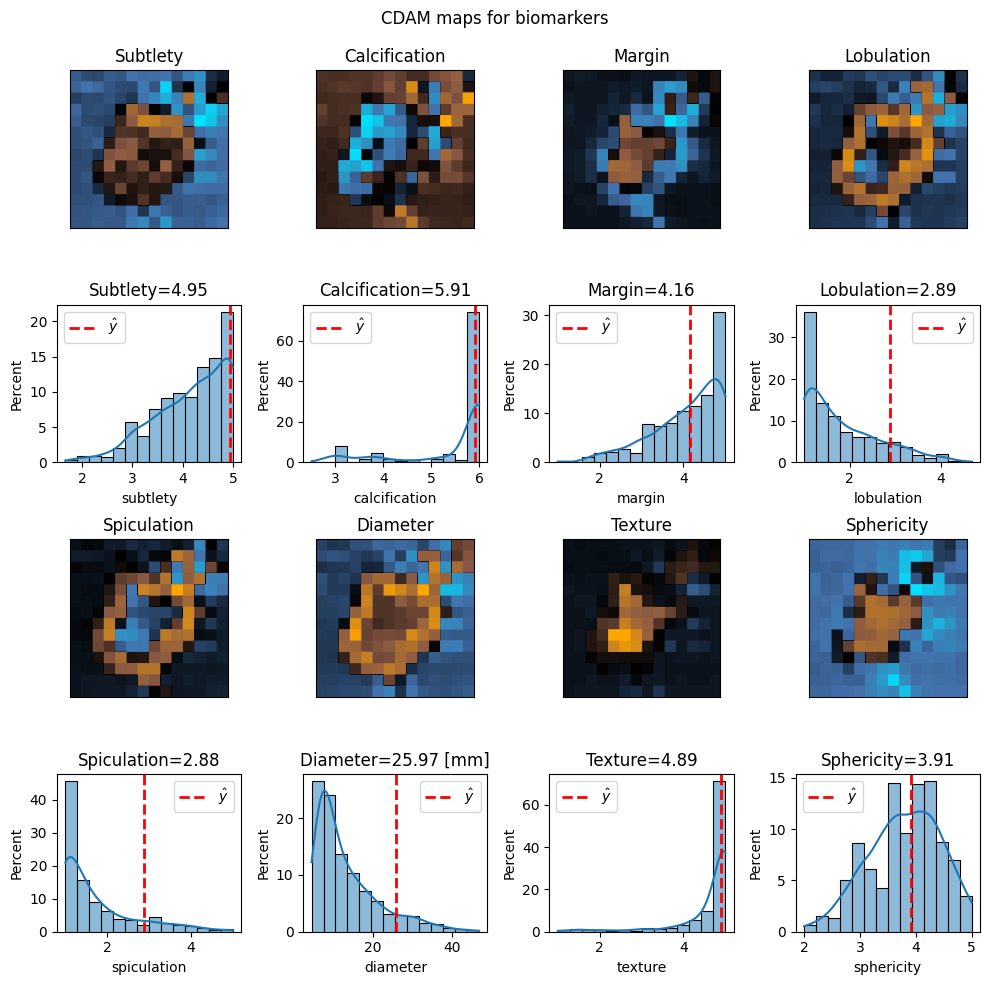

In [30]:
MODEL_BCKB="dino_vitb16"

call_CDAM(NODULE, SLICE, NODULE_VIEW, TASK, MODEL_BCKB, CKPT_VERSION, FOLD)

### DINOv2_vits14_reg

In [31]:
MODEL_BCKB="dinov2_vits14_reg"

# TO DO

### DINOv2_vitb14_reg

In [32]:
MODEL_BCKB="dinov2_vitb14_reg"

# TO DO